Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV



Pre-processing Data

In [2]:
from google.colab import files

uploaded = files.upload()

for filename, content in uploaded.items():
    print(f"Uploaded file: {filename}, size: {len(content)} bytes")


Saving train.csv to train.csv
Uploaded file: train.csv, size: 733533 bytes


In [3]:
from google.colab import files

uploaded = files.upload()

for filename, content in uploaded.items():
    print(f"Uploaded file: {filename}, size: {len(content)} bytes")

Saving test.csv to test.csv
Uploaded file: test.csv, size: 482144 bytes


In [4]:
from google.colab import files

uploaded = files.upload()

for filename, content in uploaded.items():
    print(f"Uploaded file: {filename}, size: {len(content)} bytes")

Saving sample_submission.csv to sample_submission.csv
Uploaded file: sample_submission.csv, size: 171879 bytes


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df = pd.read_csv('train.csv').set_index('id', drop=True)
test_df = pd.read_csv('test.csv').set_index('id', drop=True)
sample_submission = pd.read_csv('sample_submission.csv')

train['test'] = 0
test['test'] = 1

df = pd.concat([train, test], axis=0).reset_index(drop=True)

In [66]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,test
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,0


In [67]:
df.dtypes

N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
test               int64
dtype: object

In [68]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,test
count,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000,13176.000000
mean,2033.583030,18422.996281,2.596847,351.331815,3.544221,84.222416,1814.540225,114.197725,115.318534,264.746812,10.630823,3.034305,0.400046
std,1091.249998,3642.209391,3.828640,197.413677,0.349706,76.558760,1916.383653,48.861248,52.557379,87.511668,0.786116,0.862303,0.489926
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000
25%,1234.000000,15612.000000,0.700000,248.000000,3.350000,39.000000,824.000000,75.950000,84.000000,210.000000,10.000000,2.000000,0.000000
50%,1874.000000,18719.000000,1.100000,299.000000,3.580000,63.000000,1166.000000,106.950000,104.000000,264.000000,10.600000,3.000000,0.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1840.000000,137.950000,139.000000,316.000000,11.000000,4.000000,1.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000,1.000000


In [69]:
# Checking for categorical variables.
cat = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug']
for i in cat:
    print('\n')
    print(df[i].value_counts())
    print('\n')
    print('*'*50)



Sex
F    12213
M      963
Name: count, dtype: int64


**************************************************


Ascites
N    12552
Y      624
Name: count, dtype: int64


**************************************************


Hepatomegaly
Y    6772
N    6404
Name: count, dtype: int64


**************************************************


Spiders
N    9938
Y    3238
Name: count, dtype: int64


**************************************************


Edema
N    11947
S      661
Y      568
Name: count, dtype: int64


**************************************************


Drug
Placebo            6704
D-penicillamine    6472
Name: count, dtype: int64


**************************************************


In [70]:
# Using Label Encoder for categorical variables
le = LabelEncoder()

for col in cat[:-2]:
    df[col] = le.fit_transform(df[col])

In [71]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,test
0,999,D-penicillamine,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,0
1,2574,Placebo,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,0
2,3428,Placebo,13727,0,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,0
3,2576,Placebo,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,0
4,788,Placebo,16658,0,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,2870,Placebo,12279,0,0,0,0,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0,NaN,1
13172,1770,Placebo,24803,0,0,0,0,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0,NaN,1
13173,3707,D-penicillamine,16990,0,0,1,0,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0,NaN,1
13174,1216,Placebo,11773,0,0,0,0,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0,NaN,1


In [72]:
# Checking for missing data types
invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:  \n", invalid_entries)

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicates)

Invalid Entries:  
 N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
test             0
dtype: int64

Number of Duplicate Records: 0


In [73]:
# Checking for unique datatypes
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Unique entries in the column above\n\n '{column}': {unique_entries}")

Unique entries in the column above

 'N_Days': [ 999 2574 3428 2576  788  703 1300 1615 2050 2615 3581 1614 1847 1153
  904 1212 1967 1592 1481 3358 3092  326 2363 1152 3577  799 1832 4467
 2301  943 1882 3244 3090  850 2168 1786 1455  334 1363 3170 4032 2835
 1434 3913  994 1666 3820 1149  930 2157 2555 1776 4050   51 3445 1765
 3458  552 2769 4453 2504  980  853  786 3395 2357  549 1447  732  597
  708 2105 1295 2419 3098  769 1083 1785 1657 1418  737 1701 2598 2891
 1234 3933 1271 3099 1831 3707  191 2318 1321 1420  794 1690 3672  837
 1349 2556 4523 1170 1191 1367 1412 4509 2294 2976 1303 1250 2255 1293
 3149 1433 2583 3086 2297 1908 1000 2224 4190 4500 1978 2386 2624 4079
 1568 3422 4365 3336 1576 2990  762 1951 3839  974 2403 1649 2022 1770
 3297 1569 1297 2713 1282   77 1197 4039 1302  304 1487 2365 2170  321
 1725  971 1077 3468 2350 1677 1216  385 2657 1945 1408 1444 1702 1030
  179 1360 1525 1682  877  890 1165 2330 1783  939  216 4556  735 2449
 1932 3574 3853  223 3282 1012

Data VIsualization

IndexError: index 6 is out of bounds for axis 0 with size 6

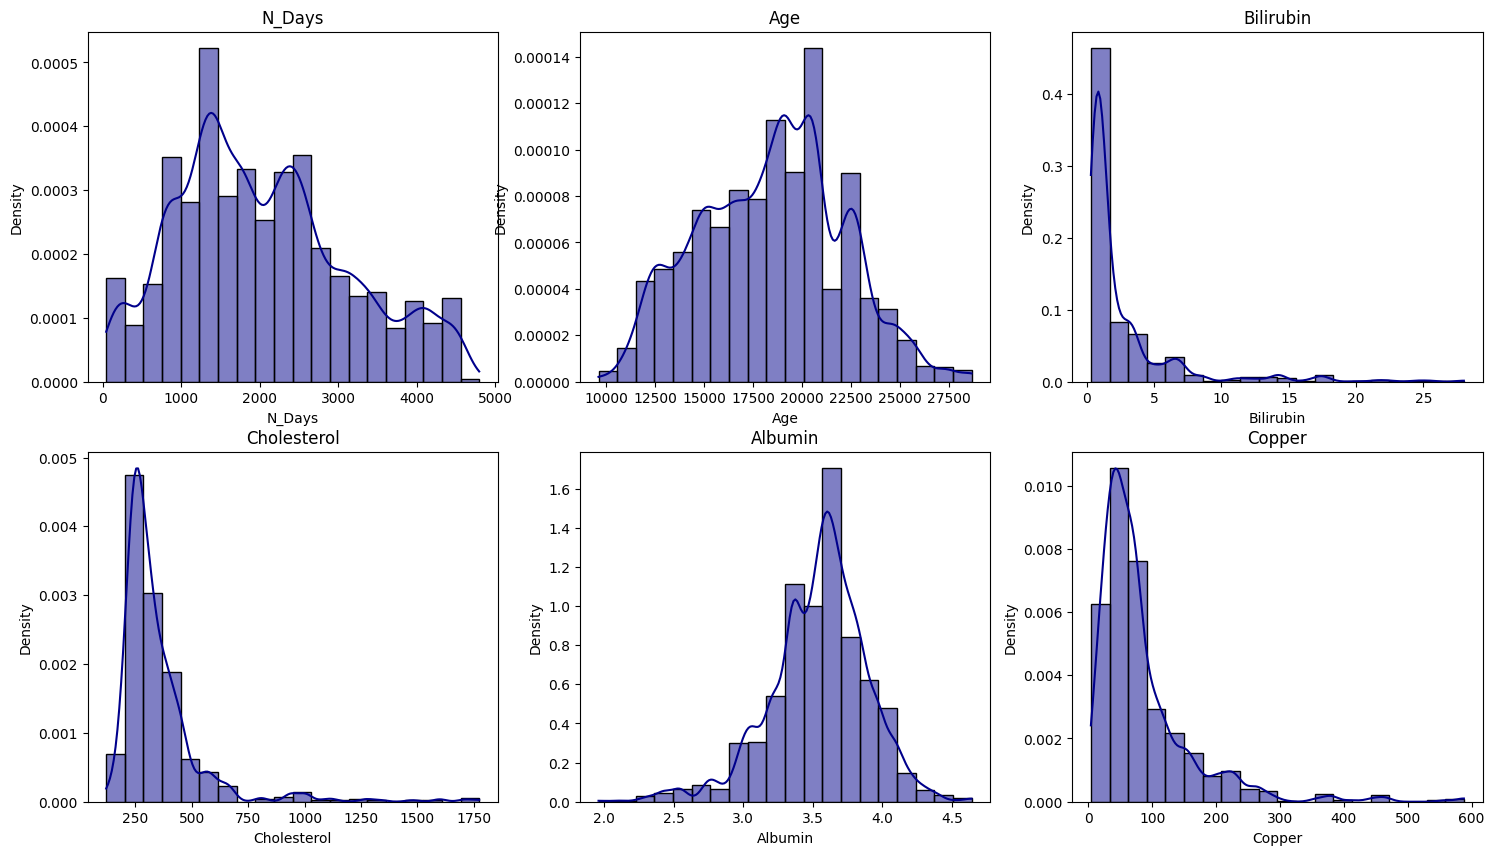

In [74]:
unique_counts = df.nunique()
selected_columns = unique_counts[unique_counts > 4].index

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(selected_columns):
    sns.histplot(df[col], bins=20, color='darkblue', kde=True, ax=axes[i], stat='density', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

IndexError: index 5 is out of bounds for axis 0 with size 5

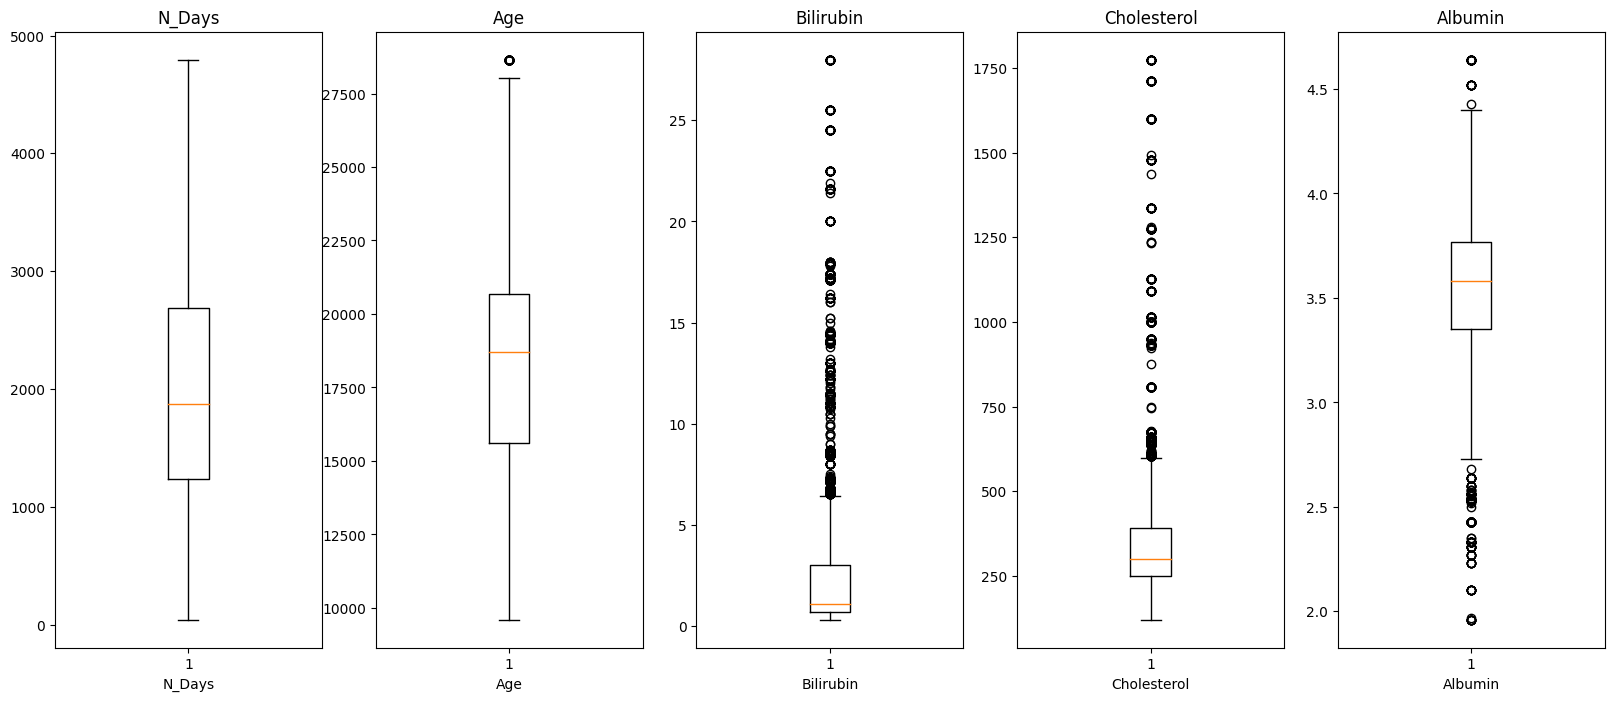

In [75]:
#Using boxplot to find potential outliers
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 8))

for i, col in enumerate(selected_columns):
    ax = axes[i]
    ax.boxplot(df[col])
    ax.set_title(col)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [76]:
# Removing Outliers
columns_to_remove_outliers = ['Bilirubin', 'Cholesterol', 'Albumin',]

for col in columns_to_remove_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_filtered = df.dropna(subset=columns_to_remove_outliers)

print('Number of rows before removing outliers:', len(df))
print('Number of rows after removing outliers:', len(df_filtered),"\n\n")

Number of rows before removing outliers: 13176
Number of rows after removing outliers: 11186 




In [77]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11186 entries, 0 to 13175
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         11186 non-null  int64  
 1   Drug           11186 non-null  object 
 2   Age            11186 non-null  int64  
 3   Sex            11186 non-null  int64  
 4   Ascites        11186 non-null  int64  
 5   Hepatomegaly   11186 non-null  int64  
 6   Spiders        11186 non-null  int64  
 7   Edema          11186 non-null  object 
 8   Bilirubin      11186 non-null  float64
 9   Cholesterol    11186 non-null  float64
 10  Albumin        11186 non-null  float64
 11  Copper         11186 non-null  float64
 12  Alk_Phos       11186 non-null  float64
 13  SGOT           11186 non-null  float64
 14  Tryglicerides  11186 non-null  float64
 15  Platelets      11186 non-null  float64
 16  Prothrombin    11186 non-null  float64
 17  Stage          11186 non-null  float64
 18  Status     

In [78]:
df[selected_columns].skew()

N_Days           0.441074
Age              0.043249
Bilirubin        1.741314
Cholesterol      0.856013
Albumin         -0.157546
Copper           2.768565
Alk_Phos         3.204960
SGOT             1.589117
Tryglicerides    2.557901
Platelets        0.422095
Prothrombin      1.222152
dtype: float64

IndexError: index 6 is out of bounds for axis 0 with size 6

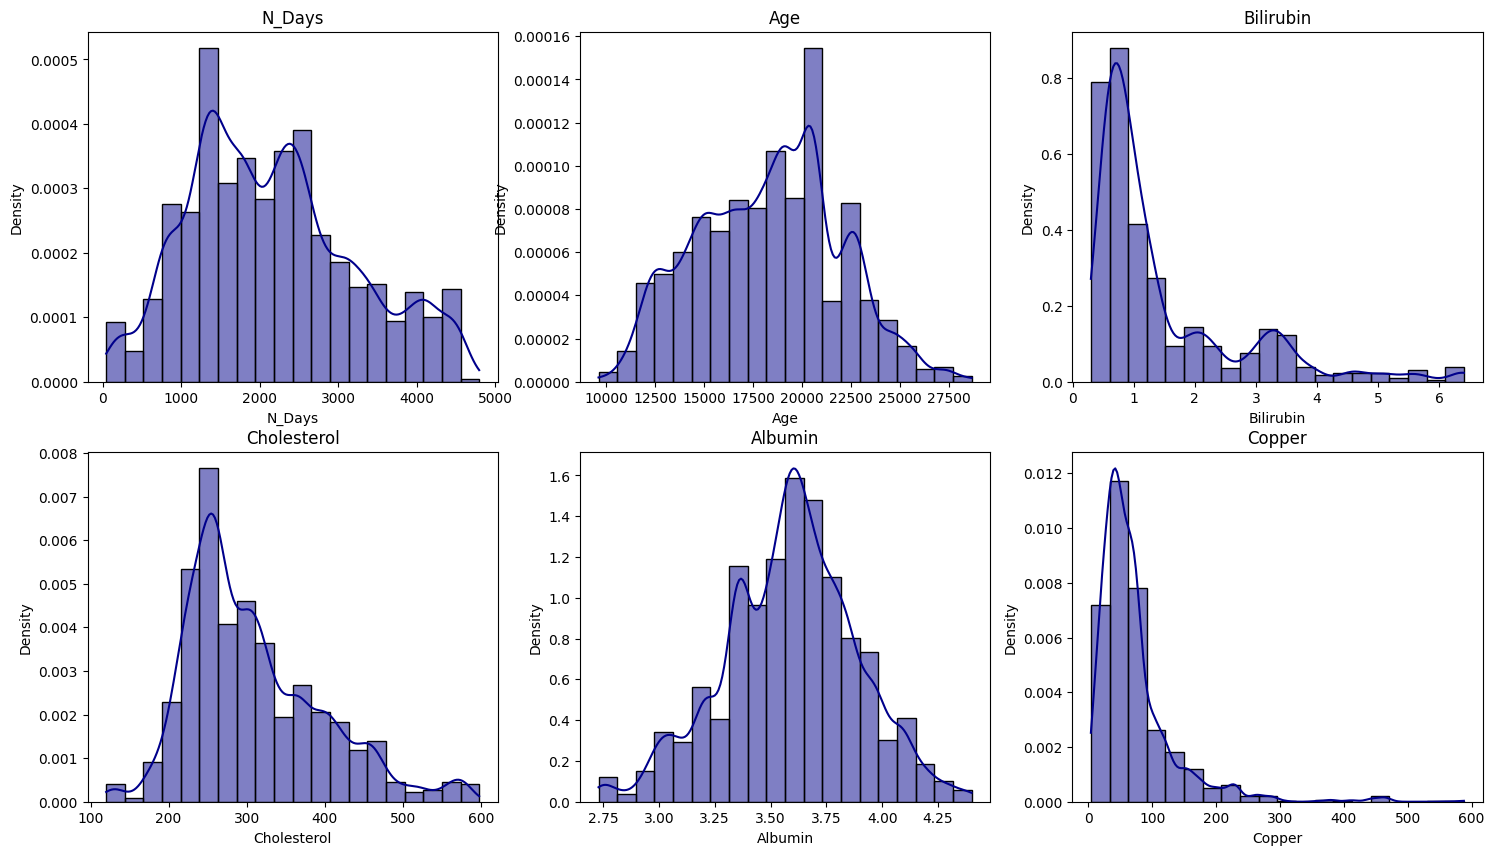

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
unique_counts_filtered = df_filtered.nunique()
selected_columns = unique_counts_filtered[unique_counts_filtered > 4].index

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(selected_columns):
    sns.histplot(df_filtered[col], bins=20, color='darkblue', kde=True, ax=axes[i], stat='density', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

Feature Engineering

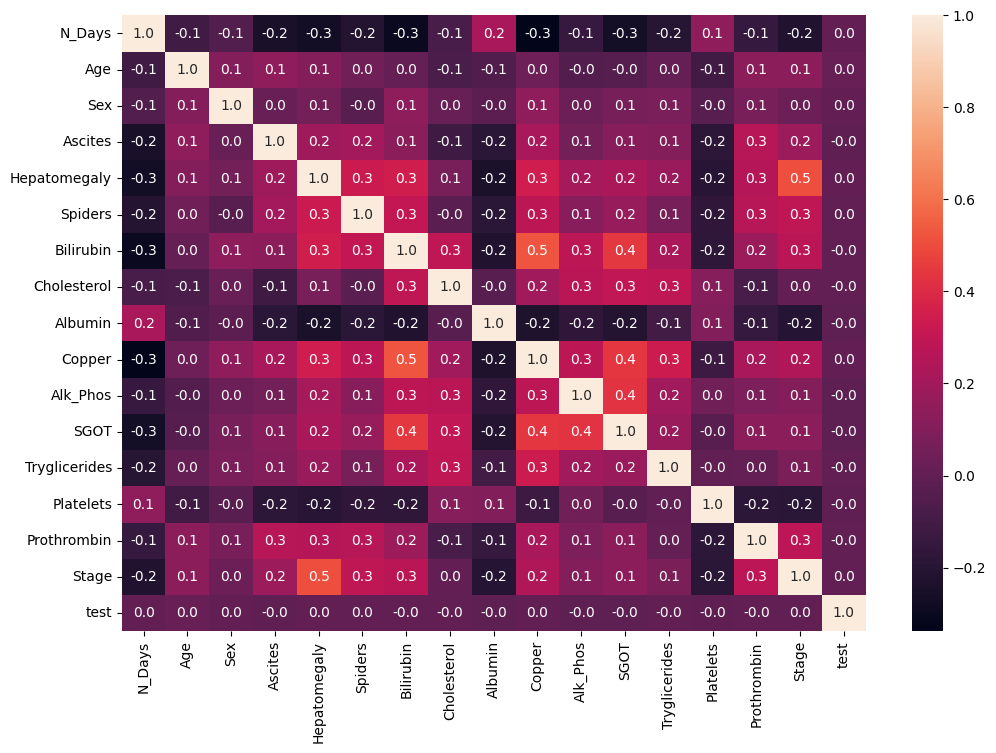

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(method='spearman'), annot=True, fmt=".1f", )
plt.show()

Models

In [98]:
import seaborn as sns
from sklearn.svm import SVC
from tabulate import tabulate
import matplotlib.pylab as plt

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [99]:
X = train_df.drop(['Status'],axis=1)
Y = train_df['Status']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.2, random_state = 42)

In [100]:
RF_Params = {
    'n_estimators': [50,100,200],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

KNN_Params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'leaf_size': [15, 20]
}

In [101]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors = 3),
    'SVM_RBF': SVC(kernel='rbf', random_state = 42),
    'DecisionTree': DecisionTreeClassifier(random_state = 42),
    'Log_Reg_Def': LogisticRegression(random_state = 42, max_iter = 2000),
    'RandomForest': RandomForestClassifier(n_estimators = 100, random_state = 42),
    'XGBoost': XGBClassifier(learning_rate = 0.1, n_estimators = 600, max_depth = 5),
    'XGB_Multi': XGBClassifier(objective = 'multi:softmax', num_class = 7, random_state = 0),
    'M_Forest': RandomForestClassifier(max_depth = 5, min_samples_leaf = 4, random_state = 0),
    'RF_GridSearch': GridSearchCV(estimator = RandomForestClassifier() , param_grid = RF_Params , cv=3 , scoring='neg_log_loss', n_jobs=-1),
    'KNN_GridSearch': GridSearchCV(estimator = KNeighborsClassifier() , param_grid = KNN_Params , cv=3 , scoring='neg_log_loss', n_jobs=-1)
    }
accuracies = []

In [ ]:
iter = 1
for model_name, model in models.items():
    print(f"Model : {model_name}")
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append([model_name, accuracy])

    print(f'-------------------{iter}-------------------')
    table = tabulate(accuracies, headers = ['Model', 'Accuracy'], tablefmt = 'pretty')
    #print(table)
    iter += 1

print("--------------------------------------------------")
print(table)

-------------------------------------
+----------------+--------------------+
|     Model      |      Accuracy      |
+----------------+--------------------+
|      KNN       | 0.7267552182163188 |
|    SVM_RBF     | 0.7179000632511069 |
|  DecisionTree  | 0.7311827956989247 |
|  Log_Reg_Def   | 0.7830487033523087 |
|  RandomForest  | 0.8311195445920304 |
|    XGBoost     | 0.8285895003162556 |
|   XGB_Multi    | 0.8311195445920304 |
|    M_Forest    | 0.814674256799494  |
| RF_GridSearch  | 0.8317520556609741 |
| KNN_GridSearch | 0.7463630613535737 |
+----------------+--------------------+

In [ ]:
submission = pd.DataFrame(prob,columns=['Status_C','Status_D','Status_CL'])
submission['id'] = test_id
submission=submission[['id','Status_C','Status_D','Status_CL']]
submission.to_csv('submission.csv',index=False)